In [9]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation
import itertools  # itertools for efficient looping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Metrics for model evaluation
from sklearn.model_selection import train_test_split  # Splitting data for training and testing
import pandas as pd  # Re-importing pandas (duplicate import)
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import xgboost as xgb  # XGBoost for gradient boosting
from lightgbm import LGBMClassifier  # LightGBM for gradient boosting
import os  # Operating System functions
import seaborn as sns  # Seaborn for statistical data visualization
from wordcloud import WordCloud  # WordCloud for visualizing word frequencies

In [10]:
df = pd.read_csv('C:/Users/Ayan Mondal/Downloads/End-to-End-Malicious-URL-Detection-main (1)/End-to-End-Malicious-URL-Detection-main/notebook/Dataset/malicious_phish.csv')

In [11]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [12]:
df.isna().sum()

url     0
type    0
dtype: int64

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayan
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ayan
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Tokenization and stemming
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

df['tokenized_text'] = df['url'].apply(lambda x: word_tokenize(x.lower()))
df['stemmed_text'] = df['tokenized_text'].apply(lambda x: [ps.stem(word) for word in x if word.isalnum() and word not in stop_words])

In [16]:
pip install streamlit

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import pandas as pd

# N-gram analysis with sparse matrix
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)
ngram_matrix = ngram_vectorizer.fit_transform(df['url'])

# Convert to CSR sparse matrix
sparse_df = pd.DataFrame.sparse.from_spmatrix(ngram_matrix, columns=ngram_vectorizer.get_feature_names_out())

# Display the results
print("Tokenized and Stemmed Text:")
print(df[['url', 'tokenized_text', 'stemmed_text']])
print("\nN-gram Analysis:")
sparse_df

Tokenized and Stemmed Text:
                                                      url  \
0                                        br-icloud.com.br   
1                     mp3raid.com/music/krizz_kaliko.html   
2                         bopsecrets.org/rexroth/cr/1.htm   
3       http://www.garage-pirenne.be/index.php?option=...   
4       http://adventure-nicaragua.net/index.php?optio...   
...                                                   ...   
651186            xbox360.ign.com/objects/850/850402.html   
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/   
651188         www.gamespot.com/xbox360/action/deadspace/   
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)   
651190          www.angelfire.com/goth/devilmaycrytonite/   

                                           tokenized_text stemmed_text  
0                                      [br-icloud.com.br]           []  
1                   [mp3raid.com/music/krizz_kaliko.html]           []  
2                   

,00,0001,0001 uhp,000webhostapp,000webhostapp com,001,0068555,0068555 com,01,01 day,...,za index,zh,zibae,zibae ir,zimbio,zimbio com,zip,zip codes,zoominfo,zoominfo com
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


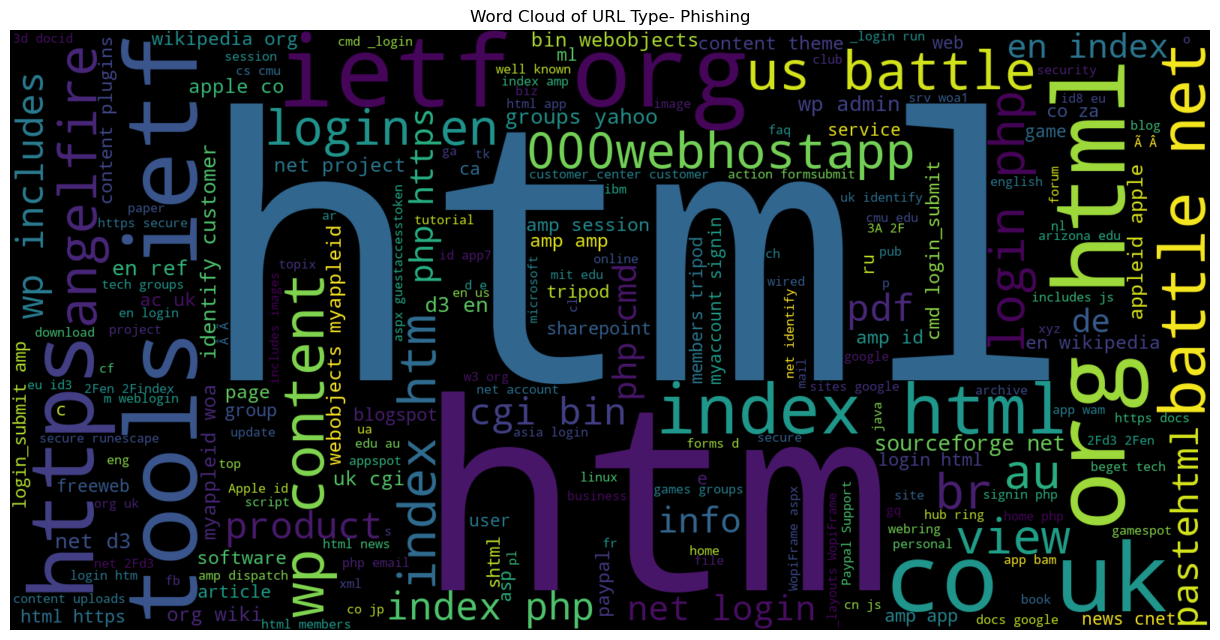

In [18]:
# Separate data into different DataFrames based on the 'type' column
df_phish = df[df.type == 'phishing']
df_malware = df[df.type == 'malware']
df_deface = df[df.type == 'defacement']
df_benign = df[df.type == 'benign']

# Concatenate phishing URLs into a single string
phish_url = " ".join(i for i in df_phish.url)

# Generate a WordCloud using a different template (e.g., 'viridis' colormap)
wordcloud = WordCloud(width=1600, height=800, colormap='viridis').generate(phish_url)

# Plot the WordCloud with a different color scheme
plt.figure(figsize=(12, 14), facecolor='w')  # Use a white background
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of URL Type- Phishing")
plt.tight_layout(pad=0)
plt.show()

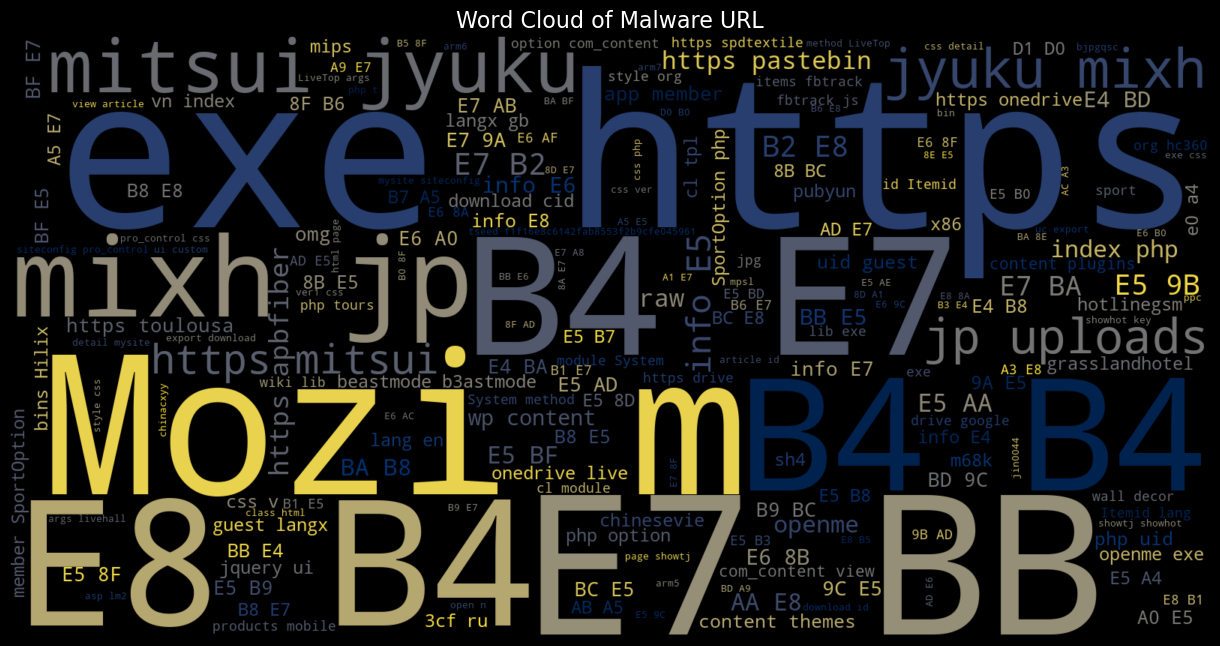

In [19]:
# Concatenate malware URLs into a single string
malware_url = " ".join(i for i in df_malware.url)

# Generate a WordCloud using a different template (e.g., 'cividis' colormap)
wordcloud = WordCloud(width=1600, height=800, colormap='cividis').generate(malware_url)

# Plot the WordCloud with a different color scheme and black background
plt.figure(figsize=(12, 14), facecolor='black')  # Use a black background
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Malware URL", fontsize=16, color='white')  # Add a title
plt.tight_layout(pad=0)
plt.show()


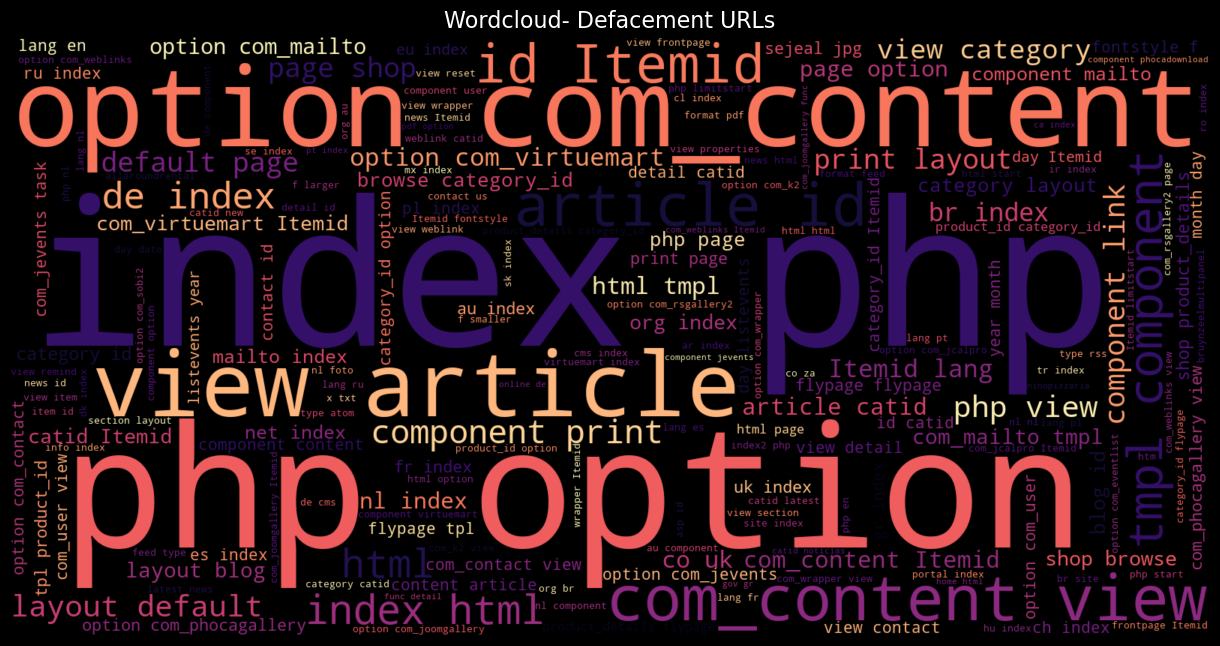

In [20]:
# Concatenate defacement URLs into a single string
deface_url = " ".join(i for i in df_deface.url)

# Generate a WordCloud using a different template (e.g., 'magma' colormap)
wordcloud = WordCloud(width=1600, height=800, colormap='magma').generate(deface_url)

# Plot the WordCloud with a different color scheme and black background
plt.figure(figsize=(12, 14), facecolor='black')  # Use a black background
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud- Defacement URLs", fontsize=16, color='white')  # Add a title
plt.tight_layout(pad=0)
plt.show()


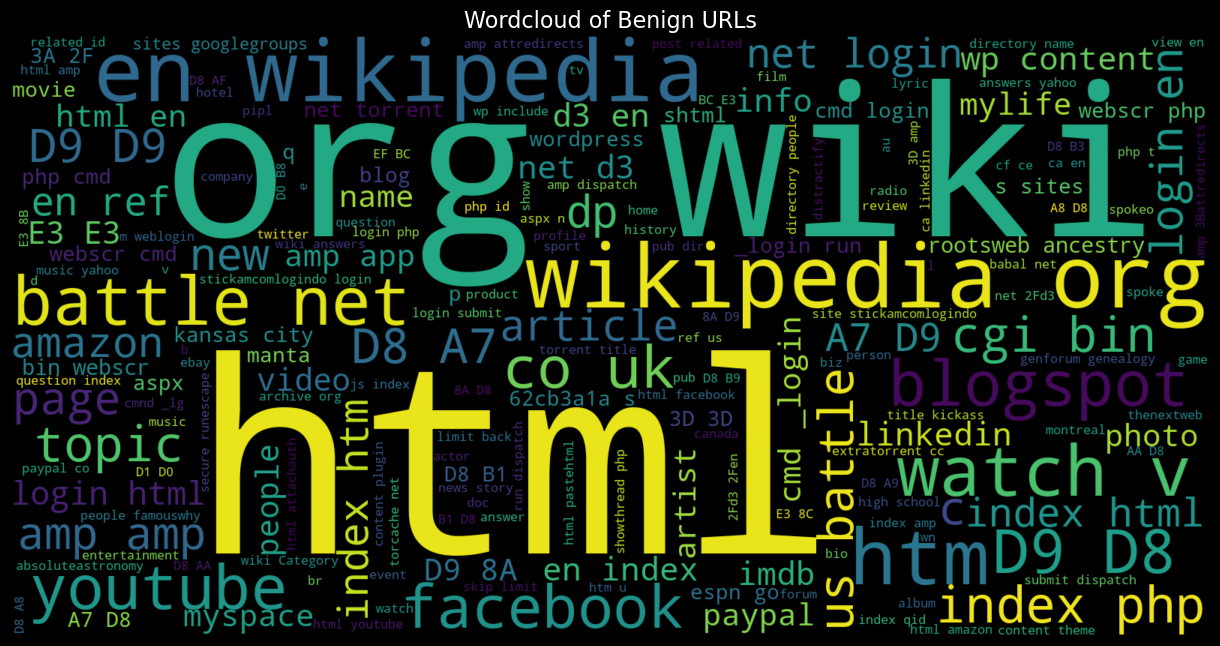

In [21]:
# Concatenate benign URLs into a single string
benign_url = " ".join(i for i in df_benign.url)

# Generate a WordCloud using a different template (e.g., 'viridis' colormap)
wordcloud = WordCloud(width=1600, height=800, colormap='viridis').generate(benign_url)

# Plot the WordCloud with a different color scheme and black background
plt.figure(figsize=(12, 14), facecolor='black')  # Use a black background
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Benign URLs", fontsize=16, color='white')  # Add a title
plt.tight_layout(pad=0)
plt.show()

In [22]:
import plotly.express as px

# Count the occurrences of each URL type
count = df['type'].value_counts()

# Choose a different set of colors for the bar chart
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF6347']

# Create a bar chart using plotly express
fig = px.bar(
    count,
    x=count.index,
    y=count,
    color=count.index,
    color_discrete_sequence=custom_colors,
    labels={'x': 'Types', 'y': 'Count'},
    title='Count of Different Types of URLs',
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis_title='Types',
    yaxis_title='Count',
)

# Customize tick colors
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))

# Show the figure
fig.show()


In [23]:
# Remove 'www.' from the 'url' column using string replace
df['url'] = df['url'].apply(lambda x: x.replace('www.', ''))

# Display the first few rows of the modified DataFrame
df.head()

,url,type,tokenized_text,stemmed_text
0,br-icloud.com.br,phishing,[br-icloud.com.br],[]
1,mp3raid.com/music/krizz_kaliko.html,benign,[mp3raid.com/music/krizz_kaliko.html],[]
2,bopsecrets.org/rexroth/cr/1.htm,benign,[bopsecrets.org/rexroth/cr/1.htm],[]
3,http://garage-pirenne.be/index.php?option=com_...,defacement,"[http, :, //www.garage-pirenne.be/index.php, ?...",[http]
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, :, //adventure-nicaragua.net/index.php,...",[http]


In [24]:
# Create a new column 'url_type' based on a mapping of 'type' values
url_type_mapping = {'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3}
df["url_type"] = df["type"].map(url_type_mapping)


In [25]:
def get_url_length(url):
    # Remove common prefixes
    prefixes = ['http://', 'https://']
    for prefix in prefixes:
        if url.startswith(prefix):
            url = url[len(prefix):]

    # Remove 'www.' if present
    url = url.replace('www.', '')

    # Return the length of the remaining URL
    return len(url)

# Apply the get_url_length function to create a new column 'url_len'
df['url_len'] = df['url'].apply(get_url_length)

In [26]:
import string  # Import the 'string' module for handling special characters

# Define functions to count letters, digits, and special characters in a URL
def count_letters(url):
    return sum(char.isalpha() for char in url)

def count_digits(url):
    return sum(char.isdigit() for char in url)

def count_special_chars(url):
    special_chars = set(string.punctuation)
    return sum(char in special_chars for char in url)

# Apply the count functions to create new columns in the DataFrame
df['letters_count'] = df['url'].apply(count_letters)
df['digits_count'] = df['url'].apply(count_digits)
df['special_chars_count'] = df['url'].apply(count_special_chars)

In [27]:
import re  # Import the 're' module for regular expressions

from urllib.parse import urlparse  # Import the 'urlparse' function from the 'urllib.parse' module

# Define a function to check if a URL contains an abnormal subdomain
def abnormal_url(url):
    # Parse the URL using urlparse
    parsed_url = urlparse(url)
    
    # Extract the netloc from the parsed URL
    netloc = parsed_url.netloc
    
    # Check if netloc is present
    if netloc:
        # Convert netloc to a string
        netloc = str(netloc)
        
        # Search for the netloc in the URL using regex
        match = re.search(netloc, url)
        
        # Check if a match is found
        if match:
            return 1  # URL contains an abnormal subdomain
    return 0  # URL does not contain an abnormal subdomain

# Create a new column 'abnormal_url' based on the presence of an abnormal subdomain in the URL
df['abnormal_url'] = df['url'].apply(abnormal_url)

In [28]:
from urllib.parse import urlparse  # Import the 'urlparse' function from the 'urllib.parse' module

# Define a function to check if a URL uses secure HTTPS protocol
def secure_http(url):
    # Extract the scheme from the parsed URL using urlparse
    scheme = urlparse(url).scheme
    
    # Check if the scheme is 'https'
    return int(scheme == 'https')

# Create a new column 'secure_http' based on whether the URL uses the secure HTTPS protocol
df['secure_http'] = df['url'].apply(secure_http)

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



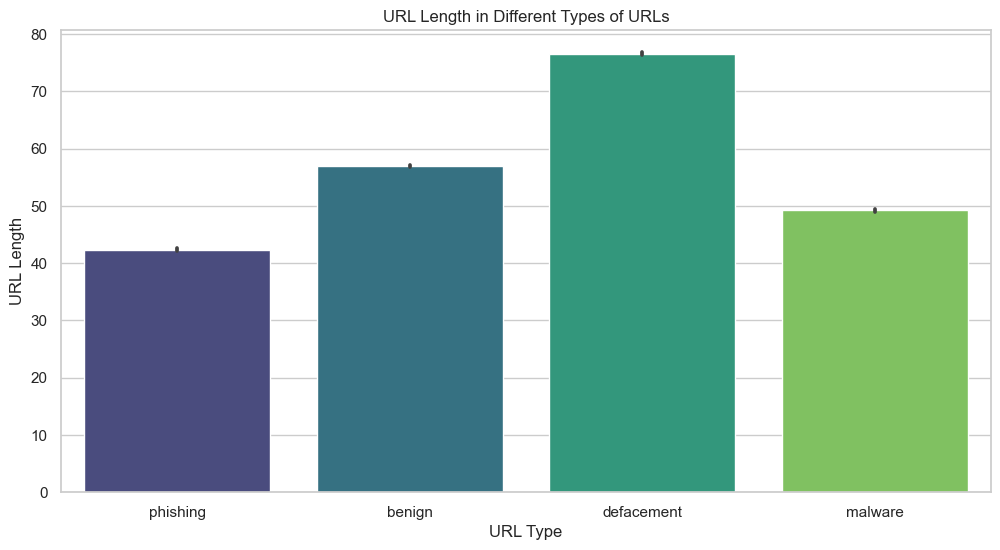

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for plotting
plot_data_url_len = df[['type', 'url_len']]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of url_len for each URL type
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='url_len', data=plot_data_url_len, palette="viridis")

# Set plot labels and title
plt.xlabel('URL Type')
plt.ylabel('URL Length')
plt.title('URL Length in Different Types of URLs')

# Show the plot
plt.show()

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be rem

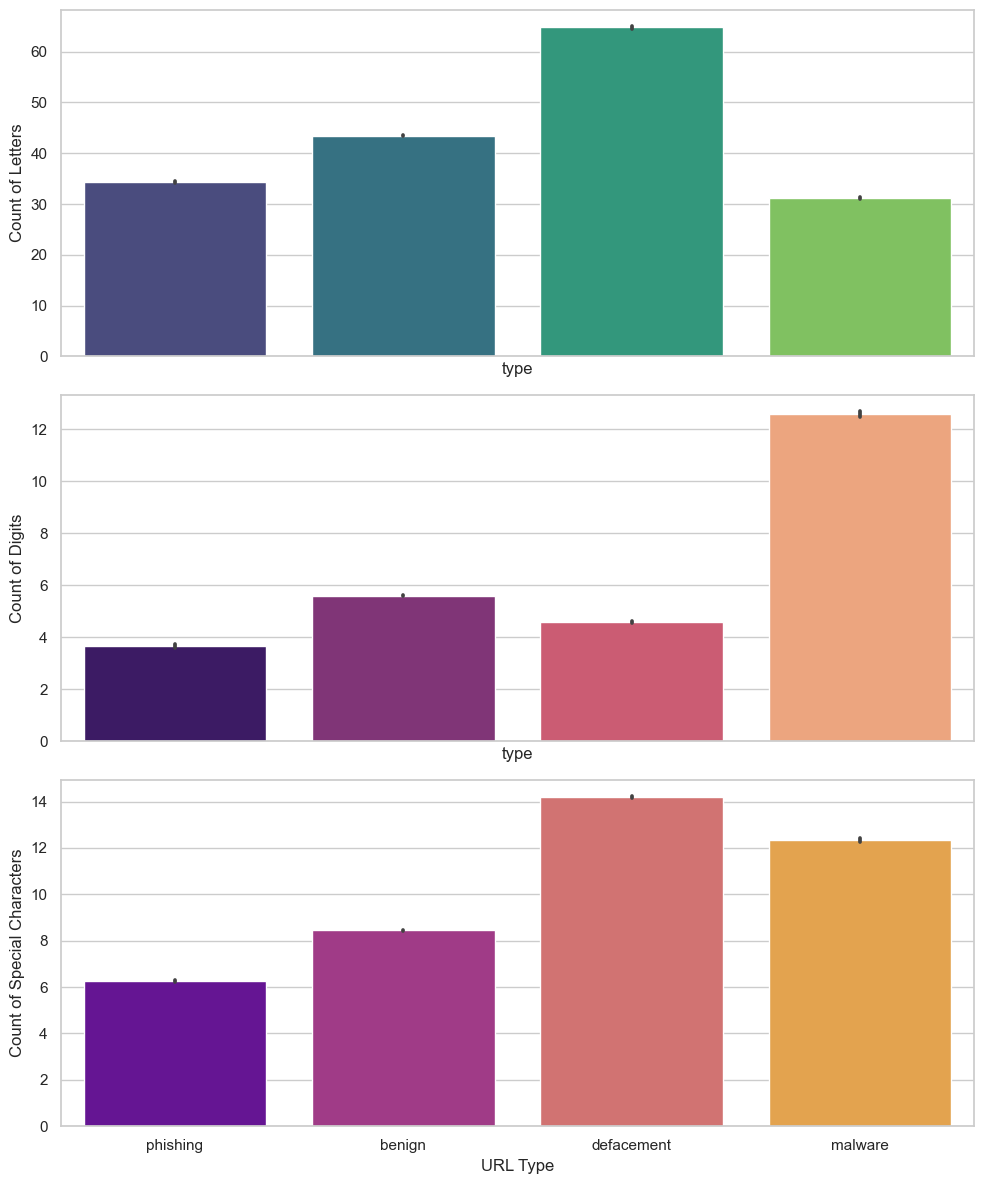

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for plotting
plot_data = df[['type', 'letters_count', 'digits_count', 'special_chars_count']]

# Set the style for the plot
sns.set(style="whitegrid")

# Create subplots for each count type
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

# Plot counts of letters
sns.barplot(x='type', y='letters_count', data=plot_data, palette="viridis", ax=axes[0])
axes[0].set_ylabel('Count of Letters')

# Plot counts of digits
sns.barplot(x='type', y='digits_count', data=plot_data, palette="magma", ax=axes[1])
axes[1].set_ylabel('Count of Digits')

# Plot counts of special characters
sns.barplot(x='type', y='special_chars_count', data=plot_data, palette="plasma", ax=axes[2])
axes[2].set_ylabel('Count of Special Characters')

# Set common x-axis label
axes[-1].set_xlabel('URL Type')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



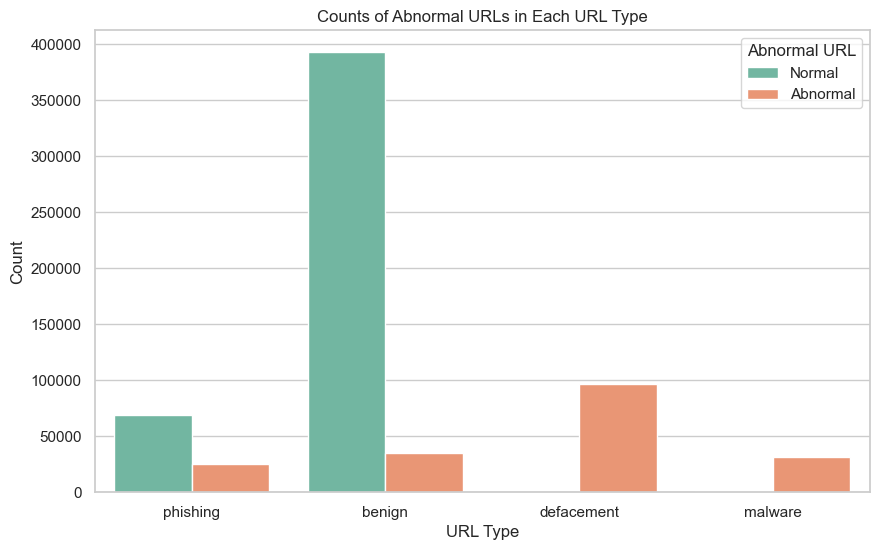

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for plotting
plot_data_abnormal = df[['type', 'abnormal_url']]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of abnormal URL counts for each URL type
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='abnormal_url', data=plot_data_abnormal, palette="Set2")

# Set plot labels and title
plt.xlabel('URL Type')
plt.ylabel('Count')
plt.title('Counts of Abnormal URLs in Each URL Type')

# Show legend
plt.legend(title='Abnormal URL', labels=['Normal', 'Abnormal'])

# Show the plot
plt.show()

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



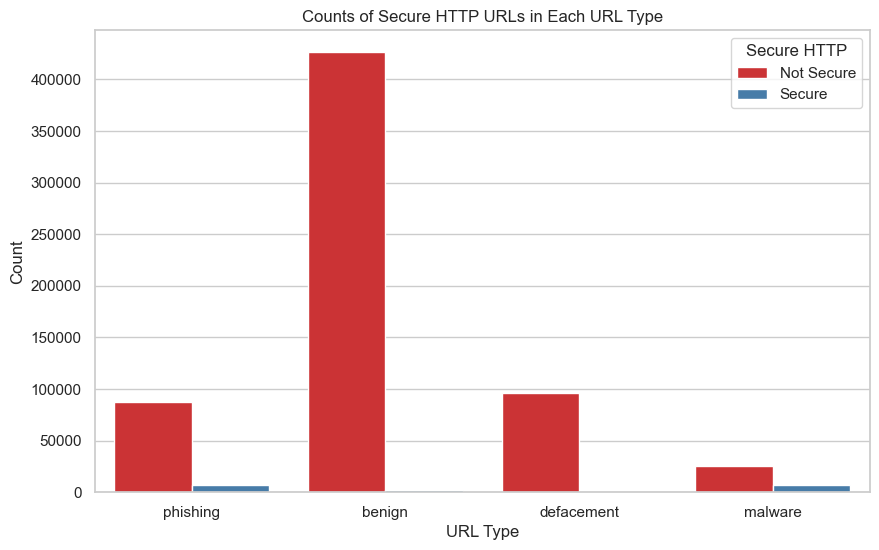

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for plotting
plot_data_secure_http = df[['type', 'secure_http']]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of secure HTTP URL counts for each URL type
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='secure_http', data=plot_data_secure_http, palette="Set1")

# Set plot labels and title
plt.xlabel('URL Type')
plt.ylabel('Count')
plt.title('Counts of Secure HTTP URLs in Each URL Type')

# Show legend
plt.legend(title='Secure HTTP', labels=['Not Secure', 'Secure'])

# Show the plot
plt.show()

In [33]:
cols_to_drop=['url', 'tokenized_text', 'stemmed_text', 'type']
df=df.drop(cols_to_drop,axis=1) ## dropiing column

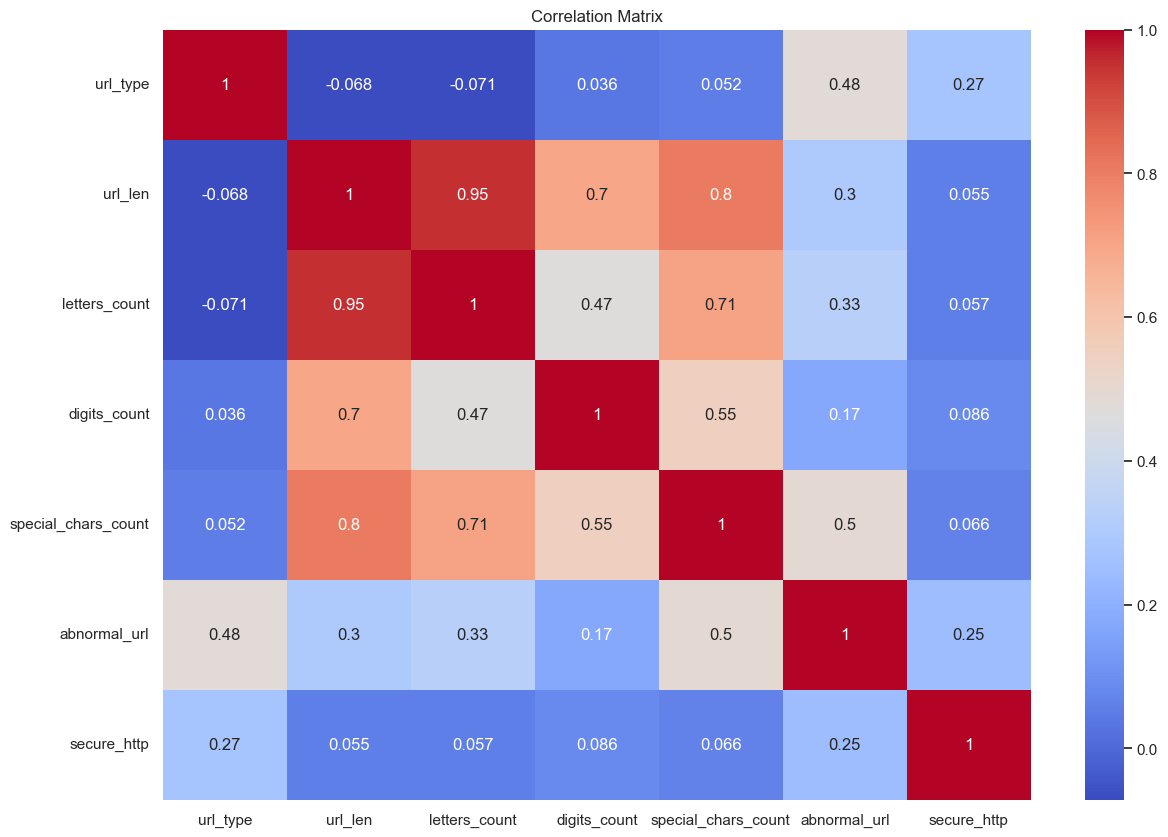

In [34]:
# Computing correlation matrix
corr = df.corr()

# Creating heatmap with correlation values
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax) 

# Setting title
ax.set_title("Correlation Matrix")

# Displaying plot
plt.show()

In [35]:
X = df.drop(["url_type"], axis=1) 
Y = df["url_type"] ## separating independent and dependent variables

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2,shuffle=True, random_state=5) ## Train Test splitting

In [37]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')

# Train the RandomForestClassifier on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Print the classification report
class_report = metrics.classification_report(Y_test, y_pred_rf, target_names=['benign', 'defacement', 'phishing', 'malware'])
print("Classification Report of Random Forest:\n", class_report)

# Calculate and print the accuracy score
rf_acc = metrics.accuracy_score(Y_test, y_pred_rf)
print("Accuracy:   %0.3f" % rf_acc)

Classification Report of Random Forest:
               precision    recall  f1-score   support

      benign       0.88      0.98      0.92     85621
  defacement       0.83      0.93      0.88     19292
    phishing       0.83      0.35      0.49     18822
     malware       0.93      0.83      0.88      6504

    accuracy                           0.87    130239
   macro avg       0.87      0.77      0.79    130239
weighted avg       0.87      0.87      0.85    130239

Accuracy:   0.870


Accuracy of Random Forest Classifier:   0.870


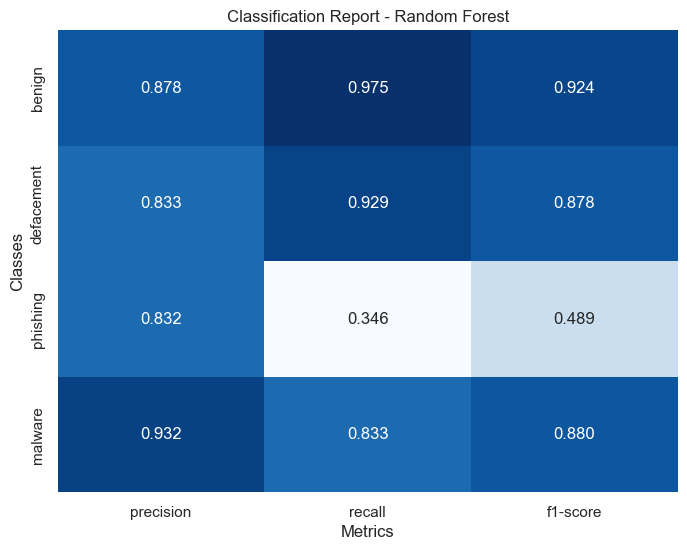

In [38]:
# Plot classification report for each class
class_report = metrics.classification_report(Y_test, y_pred_rf, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)

# Extract metrics for each class
class_metrics = {label: class_report[label] for label in ['benign', 'defacement', 'phishing', 'malware']}
class_df = pd.DataFrame(class_metrics).T[['precision', 'recall', 'f1-score']]

print("Accuracy of Random Forest Classifier:   %0.3f" % rf_acc)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_df, annot=True, cmap="Blues", fmt=".3f", cbar=False)
plt.title("Classification Report - Random Forest")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()


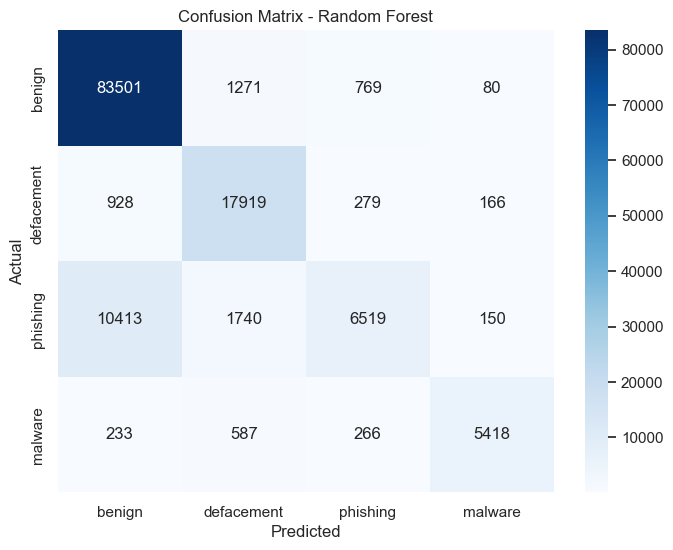

In [39]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['benign', 'defacement', 'phishing', 'malware'], yticklabels=['benign', 'defacement', 'phishing', 'malware'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model on the training data
logistic_reg.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_logistic = logistic_reg.predict(X_test)

# Print the classification report
logistic_report = metrics.classification_report(Y_test, y_pred_logistic, target_names=['benign', 'defacement', 'phishing', 'malware'])
print("Classification Report of Logistic Regression:\n", logistic_report)

# Calculate and print the accuracy score
logistic_acc = metrics.accuracy_score(Y_test, y_pred_logistic)
print("Accuracy:   %0.3f" % logistic_acc)

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Classification Report of Logistic Regression:
               precision    recall  f1-score   support

      benign       0.84      0.94      0.89     85621
  defacement       0.67      0.94      0.78     19292
    phishing       0.64      0.04      0.08     18822
     malware       0.77      0.70      0.73      6504

    accuracy                           0.80    130239
   macro avg       0.73      0.66      0.62    130239
weighted avg       0.78      0.80      0.75    130239

Accuracy:   0.798


Accuracy of Logistic Regression:   0.798


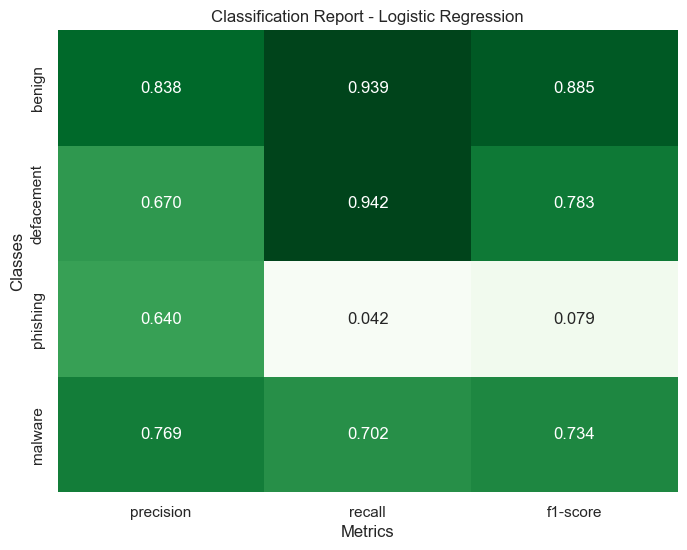

In [41]:
# Plot classification report for each class
class_report = metrics.classification_report(Y_test, y_pred_logistic, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)

# Extract metrics for each class
class_metrics = {label: class_report[label] for label in ['benign', 'defacement', 'phishing', 'malware']}
class_df = pd.DataFrame(class_metrics).T[['precision', 'recall', 'f1-score']]

print("Accuracy of Logistic Regression:   %0.3f" % logistic_acc)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_df, annot=True, cmap="Greens", fmt=".3f", cbar=False)
plt.title("Classification Report - Logistic Regression")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

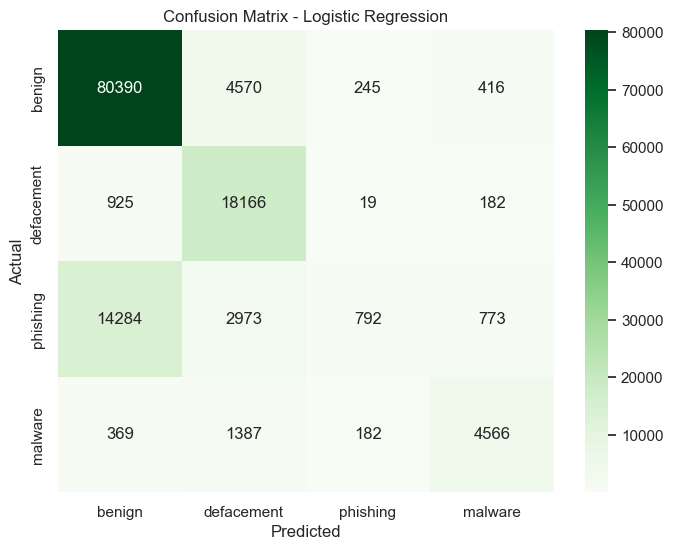

In [42]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['benign', 'defacement', 'phishing', 'malware'], yticklabels=['benign', 'defacement', 'phishing', 'malware'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize a Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model on the training data
gb_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Print the classification report
gb_report = metrics.classification_report(Y_test, y_pred_gb, target_names=['benign', 'defacement', 'phishing', 'malware'])
print("Classification Report of Gradient Boosting:\n", gb_report)

# Calculate and print the accuracy score
gb_acc = metrics.accuracy_score(Y_test, y_pred_gb)
print("Accuracy:   %0.3f" % gb_acc)

Classification Report of Gradient Boosting:
               precision    recall  f1-score   support

      benign       0.86      0.98      0.92     85621
  defacement       0.77      0.91      0.84     19292
    phishing       0.89      0.24      0.37     18822
     malware       0.85      0.72      0.78      6504

    accuracy                           0.85    130239
   macro avg       0.84      0.71      0.73    130239
weighted avg       0.85      0.85      0.82    130239

Accuracy:   0.847


Accuracy of Gradient Boost:   0.847


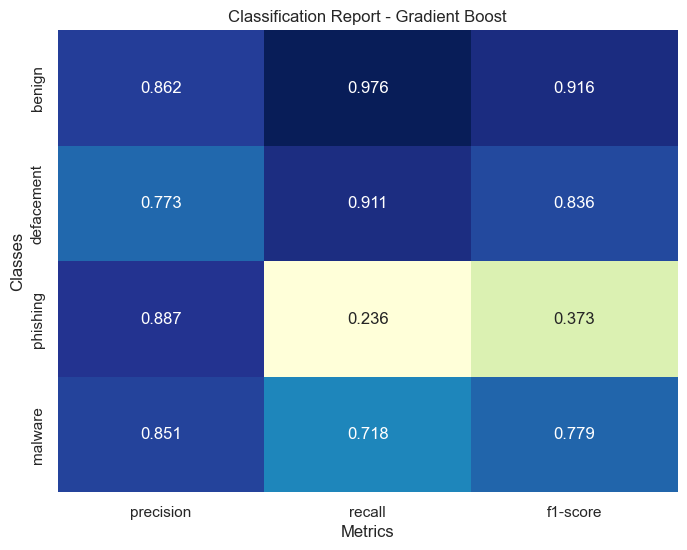

In [44]:
# Plot classification report for each class
class_report = metrics.classification_report(Y_test, y_pred_gb, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)

# Extract metrics for each class
class_metrics = {label: class_report[label] for label in ['benign', 'defacement', 'phishing', 'malware']}
class_df = pd.DataFrame(class_metrics).T[['precision', 'recall', 'f1-score']]

print("Accuracy of Gradient Boost:   %0.3f" % gb_acc)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_df, annot=True, cmap="YlGnBu", fmt=".3f", cbar=False)
plt.title("Classification Report - Gradient Boost")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()


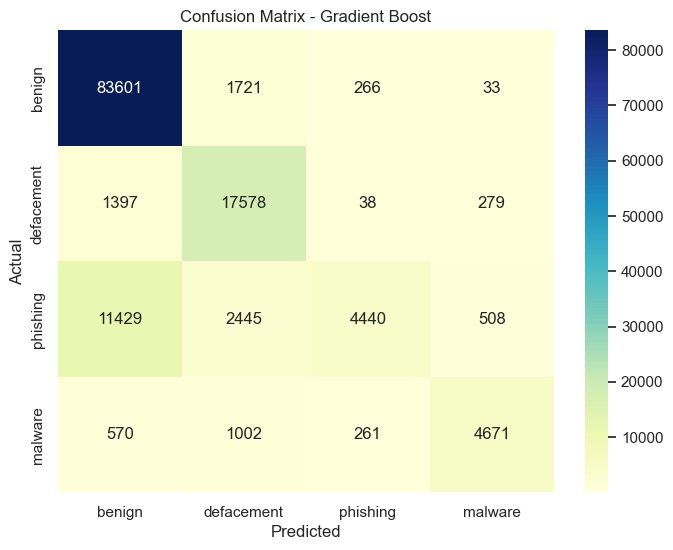

In [45]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['benign', 'defacement', 'phishing', 'malware'], yticklabels=['benign', 'defacement', 'phishing', 'malware'])
plt.title("Confusion Matrix - Gradient Boost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
from tensorflow import keras
from tensorflow.keras import layers

# Initialize the ANN model
ann_model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=4, activation='softmax')  # Assuming you have 4 classes (benign, defacement, phishing, malware)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model on the training data
ann_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test data
y_pred_ann = ann_model.predict(X_test)

# Convert predictions to class labels
y_pred_ann_classes = y_pred_ann.argmax(axis=-1)

# Print the classification report
ann_report = metrics.classification_report(Y_test, y_pred_ann_classes, target_names=['benign', 'defacement', 'phishing', 'malware'])
print("Classification Report of Artificial Neural Network:\n", ann_report)

# Calculate and print the accuracy score
ann_acc = metrics.accuracy_score(Y_test, y_pred_ann_classes)
print("Accuracy:   %0.3f" % ann_acc)




Epoch 1/10


13024/13024 [==============================] - 36s 3ms/step - loss: 0.5184 - accuracy: 0.8100 - val_loss: 0.4356 - val_accuracy: 0.8376
Epoch 2/10
13024/13024 [==============================] - 34s 3ms/step - loss: 0.4387 - accuracy: 0.8350 - val_loss: 0.4206 - val_accuracy: 0.8417
Epoch 3/10
13024/13024 [==============================] - 34s 3ms/step - loss: 0.4290 - accuracy: 0.8389 - val_loss: 0.4190 - val_accuracy: 0.8452
Epoch 4/10
13024/13024 [==============================] - 34s 3ms/step - loss: 0.4235 - accuracy: 0.8416 - val_loss: 0.4181 - val_accuracy: 0.8446
Epoch 5/10
13024/13024 [==============================] - 34s 3ms/step - loss: 0.4196 - accuracy: 0.8431 - val_loss: 0.4214 - val_accuracy: 0.8415
Epoch 6/10
13024/13024 [==============================] - 1269s 97ms/step - loss: 0.4172 - accuracy: 0.8446 - val_loss: 0.4065 - val_accuracy: 0.8503
Epoch 7/10
13024/13024 [==============================] - 97s 7ms/step - loss: 0.4150 - accuracy: 0.8458 - val

Accuracy of Artifical Neural Network:   0.848


c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



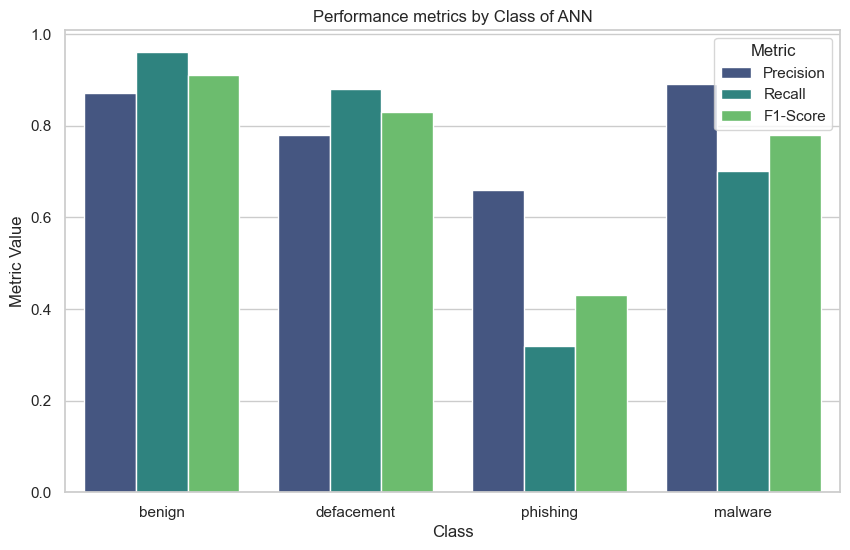

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these values with your actual precision, recall, and f1-score values
precision_values = [0.87, 0.78, 0.66, 0.89]
recall_values = [0.96, 0.88, 0.32, 0.70]
f1_score_values = [0.91, 0.83, 0.43, 0.78]
class_labels = ['benign', 'defacement', 'phishing', 'malware']

# Create a DataFrame for easy plotting
import pandas as pd
metrics_df = pd.DataFrame({
    'Class': class_labels,
    'Precision': precision_values,
    'Recall': recall_values,
    'F1-Score': f1_score_values
})

# Melt the DataFrame for easier plotting
metrics_melted = pd.melt(metrics_df, id_vars=['Class'], var_name='Metric', value_name='Value')

print("Accuracy of Artifical Neural Network:   %0.3f" % ann_acc)

# Plot the bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_melted, palette='viridis')
plt.title('Performance metrics by Class of ANN')
plt.xlabel('Class')
plt.ylabel('Metric Value')
plt.legend(title='Metric')
plt.show()


In [48]:
comparison = pd.DataFrame({'Model': ['Logistic Regression',
                                  'Random Forest Classifier', 
                                 'Graident Classifier',
                                   'Neural Network'], # setting all of the models
                        'Accuracy': [logistic_acc*100, rf_acc*100, #selecting the accuracy rate
                                      gb_acc*100,
                                     ann_acc*100]})
comparison.sort_values(by='Accuracy', ascending=False) #comparison among the accuracy rate

,Model,Accuracy
1,Random Forest Classifier,87.037677
3,Neural Network,84.799484
2,Graident Classifier,84.682776
0,Logistic Regression,79.787161


c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ayan Mondal\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



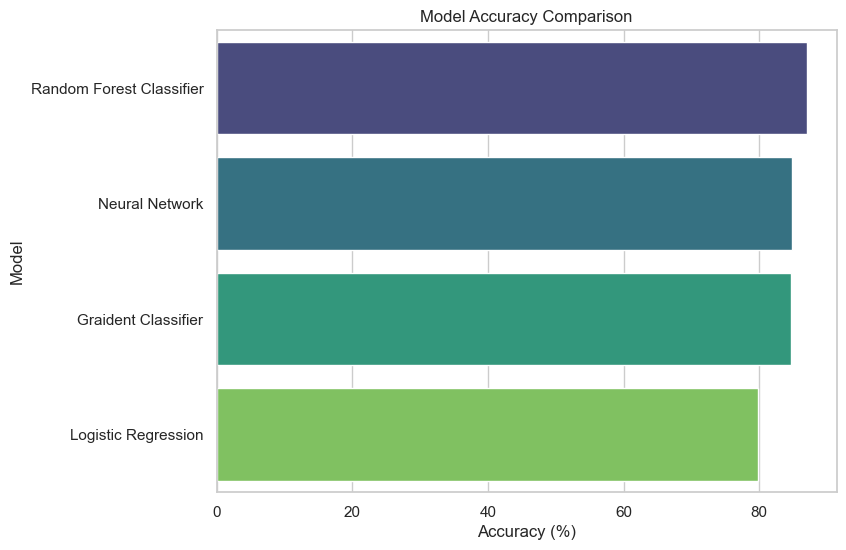

In [49]:
# Sorting the DataFrame by accuracy in descending order
comparison = comparison.sort_values(by='Accuracy', ascending=False)

# Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Model', data=comparison, palette='viridis')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.show()